In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [ ]:
pip install --upgrade pandas_datareader


In [ ]:
df = yf.download('AAPL', start='2001-01-01', end='2024-03-01')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-01-02,0.265625,0.272321,0.260045,0.265625,0.224878,452312000
2001-01-03,0.258929,0.297991,0.257813,0.292411,0.247555,817073600
2001-01-04,0.323940,0.330357,0.300223,0.304688,0.257949,739396000
2001-01-05,0.302455,0.310268,0.286830,0.292411,0.247555,412356000
2001-01-08,0.302455,0.303292,0.284598,0.295759,0.250389,373699200
...,...,...,...,...,...,...
2024-02-23,185.009995,185.039993,182.229996,182.520004,182.520004,45119700
2024-02-26,182.240005,182.759995,180.649994,181.160004,181.160004,40867400
2024-02-27,181.100006,183.919998,179.559998,182.630005,182.630005,54318900


In [ ]:
df.shape

(5826, 6)

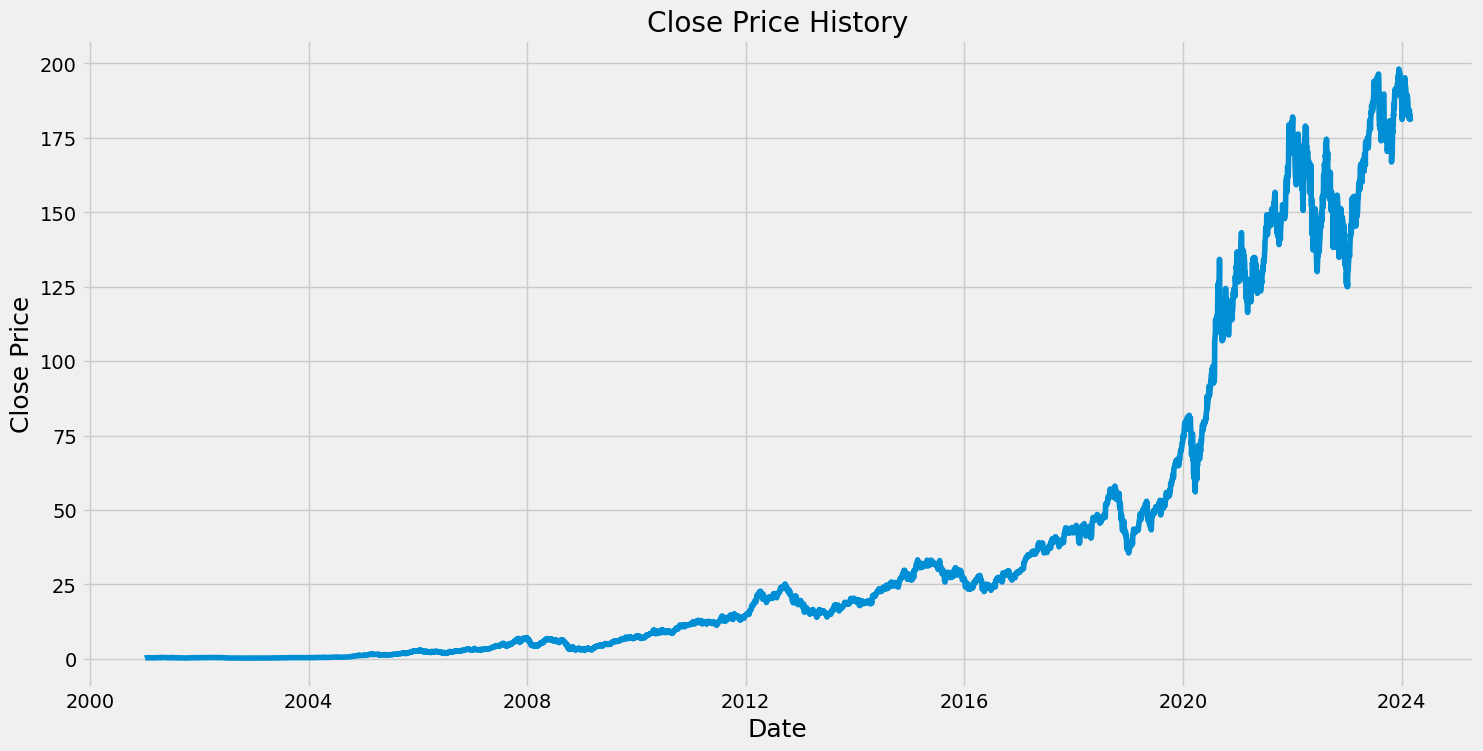

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

4661

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'dataset' is your original dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Now, 'scaled_data' contains the scaled values within the range 0 to 1
scaled_data

array([[1.58377215e-04],
       [2.93745012e-04],
       [3.55789044e-04],
       ...,
       [9.21769098e-01],
       [9.15654114e-01],
       [9.12268160e-01]])

In [ ]:
train_data = scaled_data[0 : training_data_len, :]
x_train = []
y_train =[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

[array([0.00015838, 0.00029375, 0.00035579, 0.00029375, 0.00031066,
       0.00036707, 0.00031066, 0.00044039, 0.00036707, 0.00036143,
       0.00033322, 0.00050243, 0.00057576, 0.0005532 , 0.000666  ,
       0.000666  , 0.00061524, 0.0005814 , 0.00077317, 0.00077881,
       0.00076753, 0.0007224 , 0.00067728, 0.0006378 , 0.0007224 ,
       0.00068856, 0.00068856, 0.00054192, 0.00059268, 0.00054192,
       0.00057576, 0.00062652, 0.00053064, 0.00046859, 0.00051936,
       0.00051372, 0.00051372, 0.00057576, 0.00056448, 0.00046295,
       0.00050807, 0.0005532 , 0.00065472, 0.00075625, 0.00073368,
       0.0006942 , 0.00064344, 0.00049679, 0.0005814 , 0.00066036,
       0.00059268, 0.00058704, 0.00067164, 0.00059268, 0.00063216,
       0.00076753, 0.00089161, 0.00078152, 0.00087988, 0.00081671])]
[0.0008491947371650924]



In [ ]:
x_train,y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train= np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
x_train.shape

(4601, 60, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

4601/4601 [==============================] - 53s 10ms/step - loss: 7.9429e-05


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [ ]:
predicitons = model.predict(x_test)


37/37 [==============================] - 1s 5ms/step


In [ ]:
predicitons  = scaler.inverse_transform(predicitons)

In [ ]:
rmse = np.sqrt(np.mean(predicitons - y_test)**2 )
rmse

6.177672842132176

In [ ]:
predicitons = pd.Series(predicitons.ravel(), name='Predictions')

<ipython-input-23-cccd203b49ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predicitons


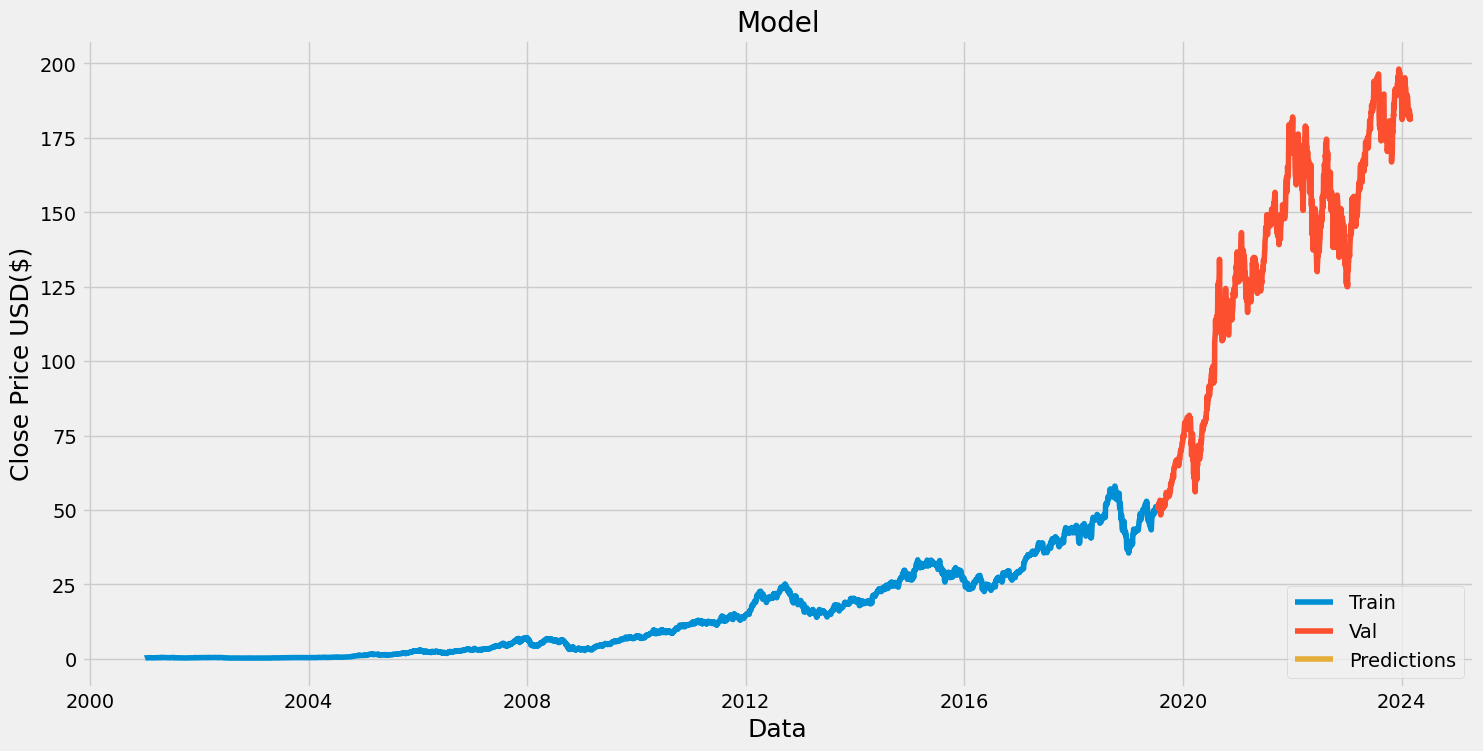

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predicitons
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show()

In [ ]:
valid

,Close,Predictions
Date,,
2019-07-16,51.125000,NaN
2019-07-17,50.837502,NaN
2019-07-18,51.415001,NaN
2019-07-19,50.647499,NaN
2019-07-22,51.805000,NaN
...,...,...
2024-02-23,182.520004,NaN
2024-02-26,181.160004,NaN
2024-02-27,182.630005,NaN


In [ ]:
valid.drop('Predictions', axis=1, inplace=True)


<ipython-input-25-e3cab687e3f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid.drop('Predictions', axis=1, inplace=True)


In [ ]:
valid

,Close
Date,
2019-07-16,51.125000
2019-07-17,50.837502
2019-07-18,51.415001
2019-07-19,50.647499
2019-07-22,51.805000
...,...
2024-02-23,182.520004
2024-02-26,181.160004
2024-02-27,182.630005


In [ ]:
valid.head()

,Close
Date,
2019-07-16,51.125000
2019-07-17,50.837502
2019-07-18,51.415001
2019-07-19,50.647499
2019-07-22,51.805000


In [ ]:
import yfinance as yf

apple_quote = yf.download('AAPL', start='2001-01-01', end='2024-02-29')


[*********************100%%**********************]  1 of 1 completed


In [ ]:
import yfinance as yf

# Download historical data for AAPL
apple_quote = yf.download('AAPL', start='2001-01-01', end='2024-02-29')

# Continue with the rest of your code...
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
x_test = np.array([last_60_days_scaled])
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
pred_price = model.predict(x_test)
pred_price = scaler.inverse_transform(pred_price)


[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 46ms/step


In [ ]:
pred_price

array([[171.40363]], dtype=float32)

In [ ]:
apple_quote2 = yf.download('AAPL', start='2001-01-01', end='2024-02-29')
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2001-01-02      0.265625
2001-01-03      0.292411
2001-01-04      0.304688
2001-01-05      0.292411
2001-01-08      0.295759
                 ...    
2024-02-22    184.369995
2024-02-23    182.520004
2024-02-26    181.160004
2024-02-27    182.630005
2024-02-28    181.419998
Name: Close, Length: 5825, dtype: float64


In [ ]:
# Predict stock prices for the next 10 days
num_days_to_predict = 10

# Initialize an array to store the predicted prices
predicted_prices = []

# Use the last 60 days' data to predict the next day, then update the input for the next prediction
for i in range(num_days_to_predict):
    x_test = np.array([last_60_days_scaled])
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Make a prediction for the next day
    pred_price = model.predict(x_test)
    pred_price = scaler.inverse_transform(pred_price)

    # Append the predicted price to the list
    predicted_prices.append(pred_price[0][0])

    # Update the last_60_days array for the next iteration
    last_60_days = np.append(last_60_days, pred_price, axis=0)
    last_60_days = np.delete(last_60_days, 0, axis=0)
    last_60_days_scaled = scaler.transform(last_60_days)

# Display the predicted prices for the next 10 days
for i in range(num_days_to_predict):
    print(f'Predicted Closing Price for Day {i + 1}: {predicted_prices[i]}')


1/1 [==============================] - 0s 19ms/step
Predicted Closing Price for Day 1: 171.40362548828125
Predicted Closing Price for Day 2: 169.45089721679688
Predicted Closing Price for Day 3: 166.9408416748047
Predicted Closing Price for Day 4: 164.25961303710938
Predicted Closing Price for Day 5: 161.5891571044922
Predicted Closing Price for Day 6: 159.015869140625
Predicted Closing Price for Day 7: 156.57948303222656
Predicted Closing Price for Day 8: 154.2950439453125
Predicted Closing Price for Day 9: 152.16371154785156
Predicted Closing Price for Day 10: 150.17857360839844


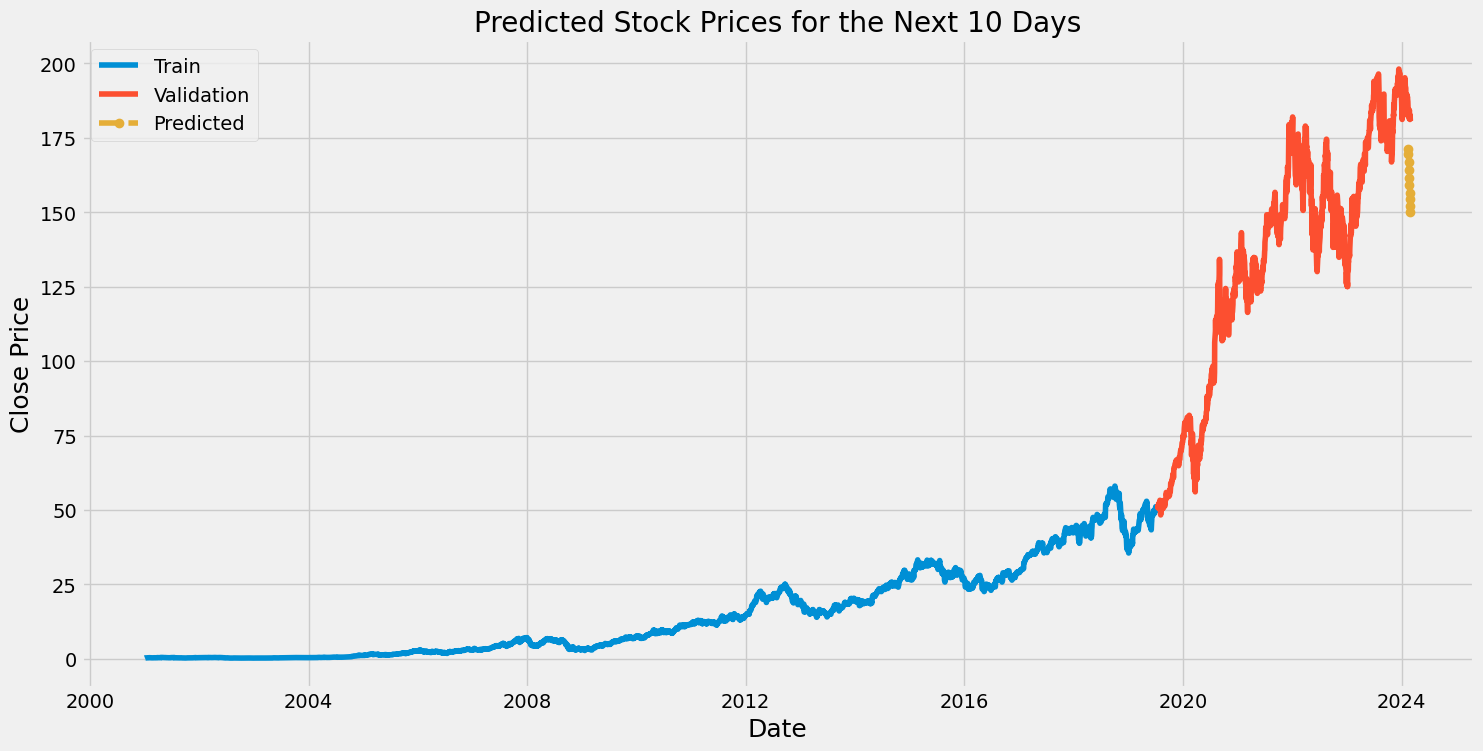

In [ ]:
# Create a new DataFrame for the predicted prices
dates_valid = valid.index[-num_days_to_predict:]
predicted_df = pd.DataFrame(index=dates_valid, columns=['Predicted'])

# Add the predicted prices to the DataFrame
predicted_df['Predicted'] = predicted_prices

# Plotting
plt.figure(figsize=(16, 8))
plt.title('Predicted Stock Prices for the Next 10 Days')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'], label='Train')
plt.plot(valid['Close'], label='Validation')
plt.plot(predicted_df['Predicted'], label='Predicted', linestyle='dashed', marker='o')
plt.legend(loc='upper left')
plt.show()


[*********************100%%**********************]  1 of 1 completed


37/37 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE) for AAPL: 11.909380687664507


<ipython-input-37-829430158fdd>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


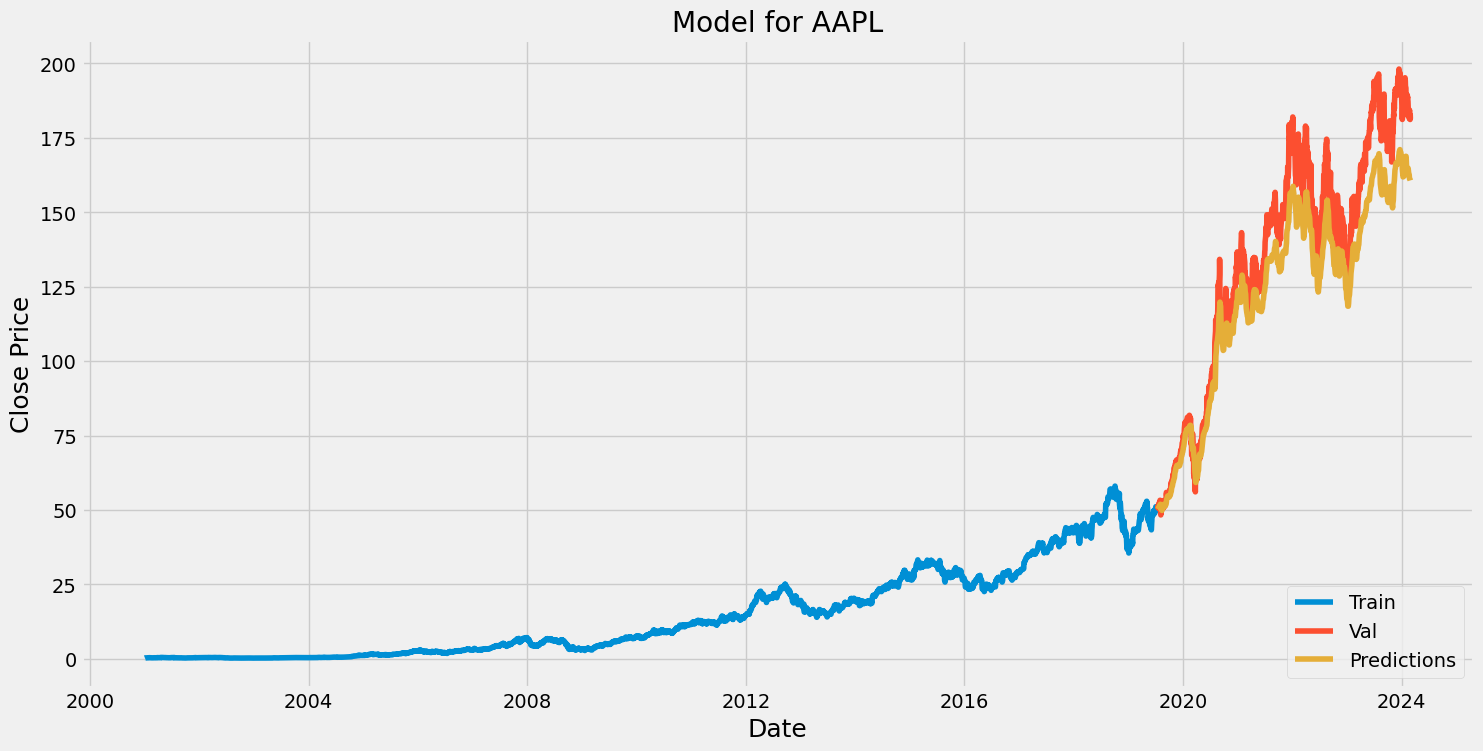

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
[*********************100%%**********************]  1 of 1 completed


31/31 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE) for GOOG: 8.956131416080199


<ipython-input-37-829430158fdd>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


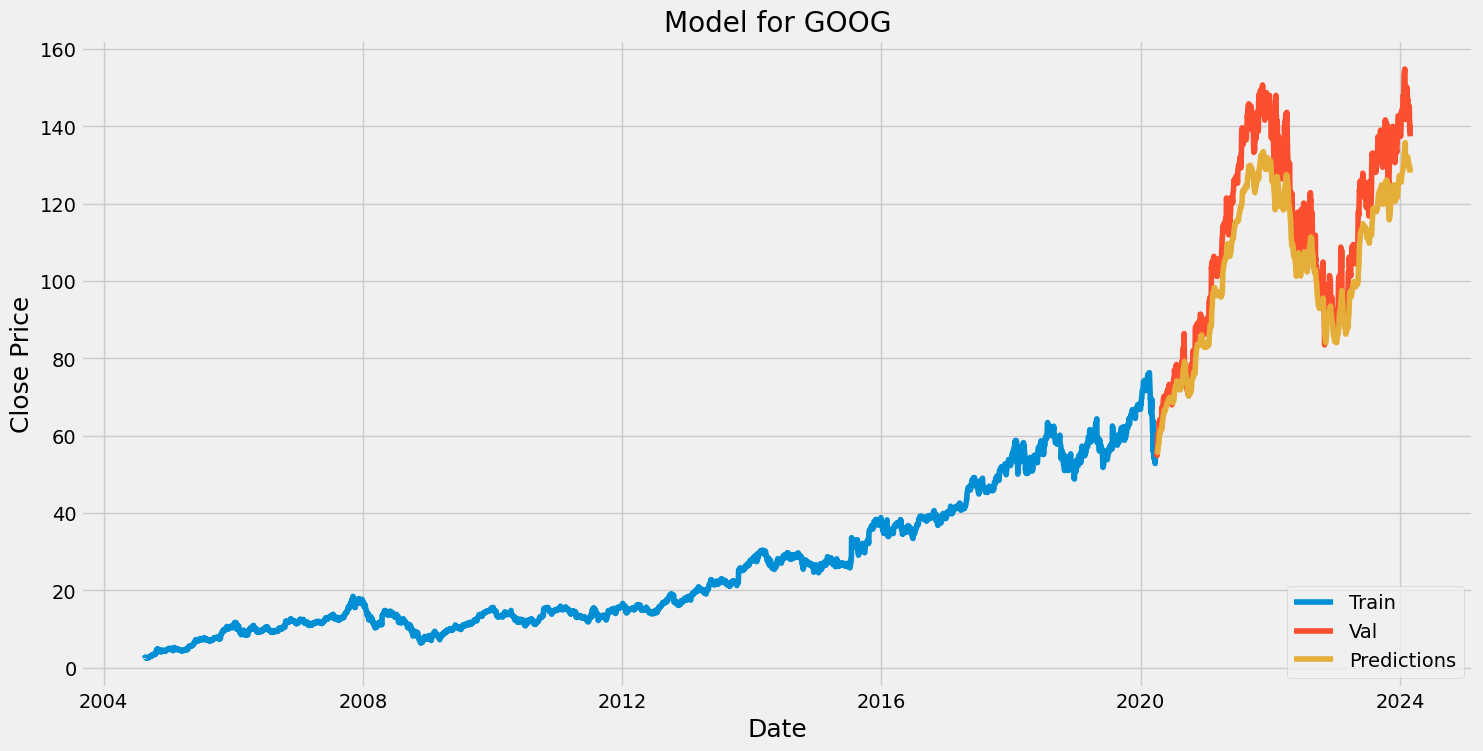

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
[*********************100%%**********************]  1 of 1 completed


37/37 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE) for MSFT: 9.897121000494568


<ipython-input-37-829430158fdd>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


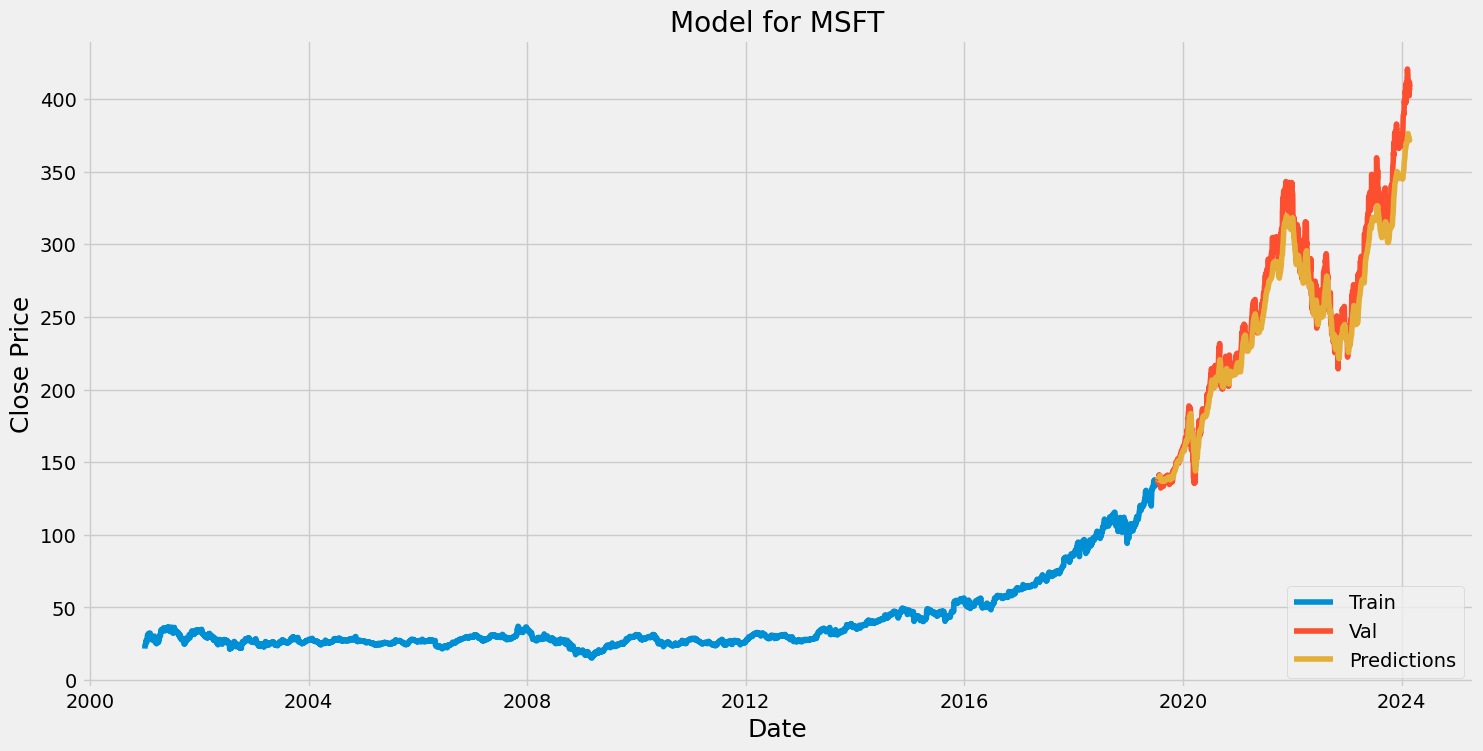

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
[*********************100%%**********************]  1 of 1 completed


37/37 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE) for AMZN: 1.5224670934063171


<ipython-input-37-829430158fdd>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


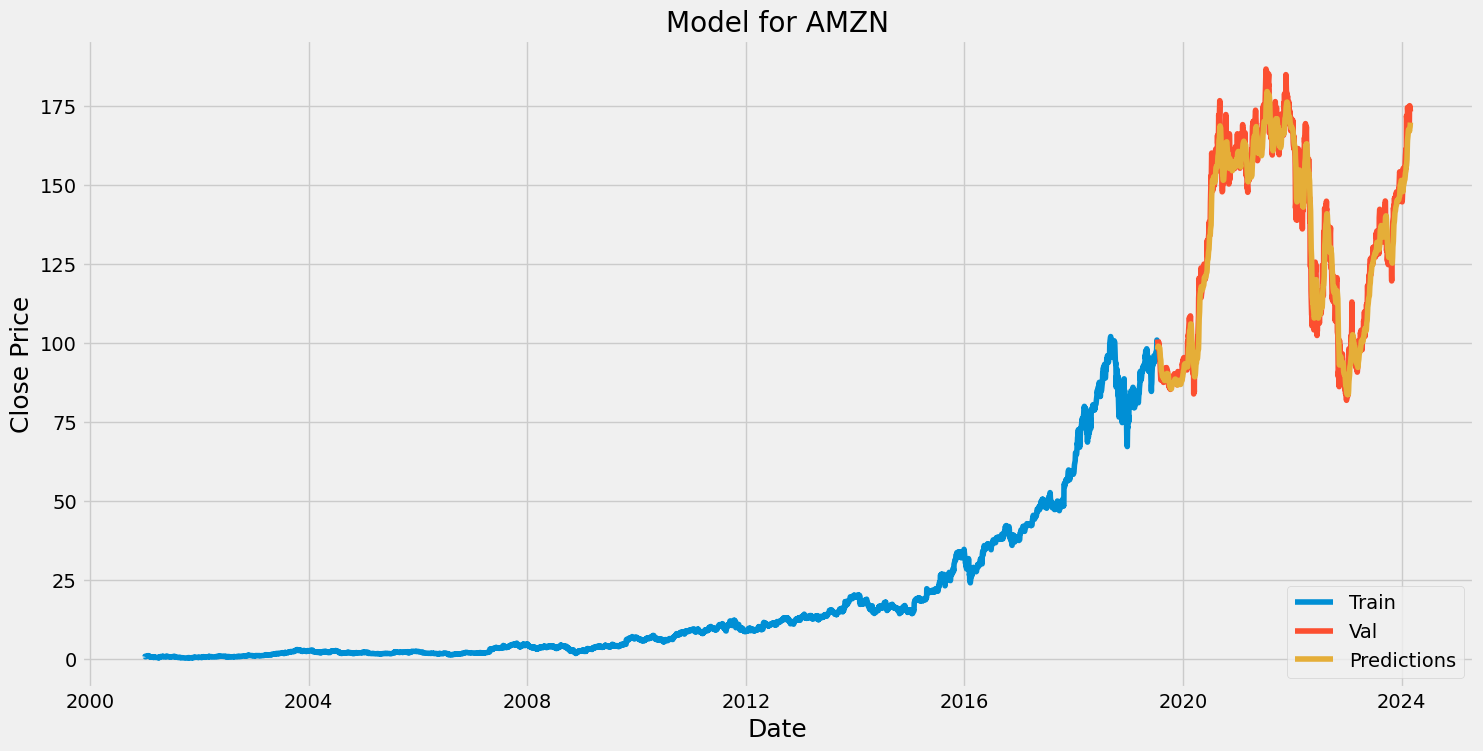

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


35/35 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE) for NFLX: 20.56350379142587


<ipython-input-37-829430158fdd>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


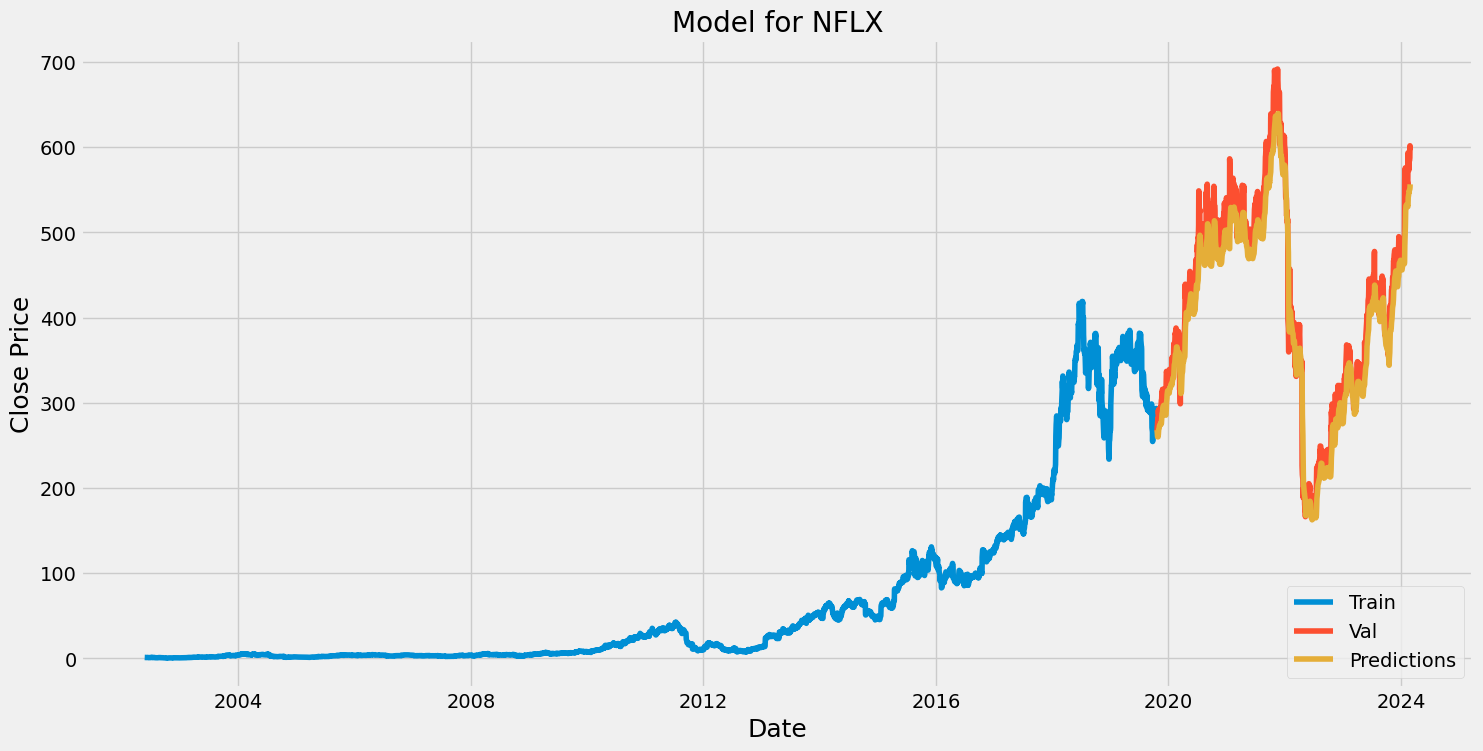

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
[*********************100%%**********************]  1 of 1 completed


22/22 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE) for TSLA: 4.477884736171989


<ipython-input-37-829430158fdd>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


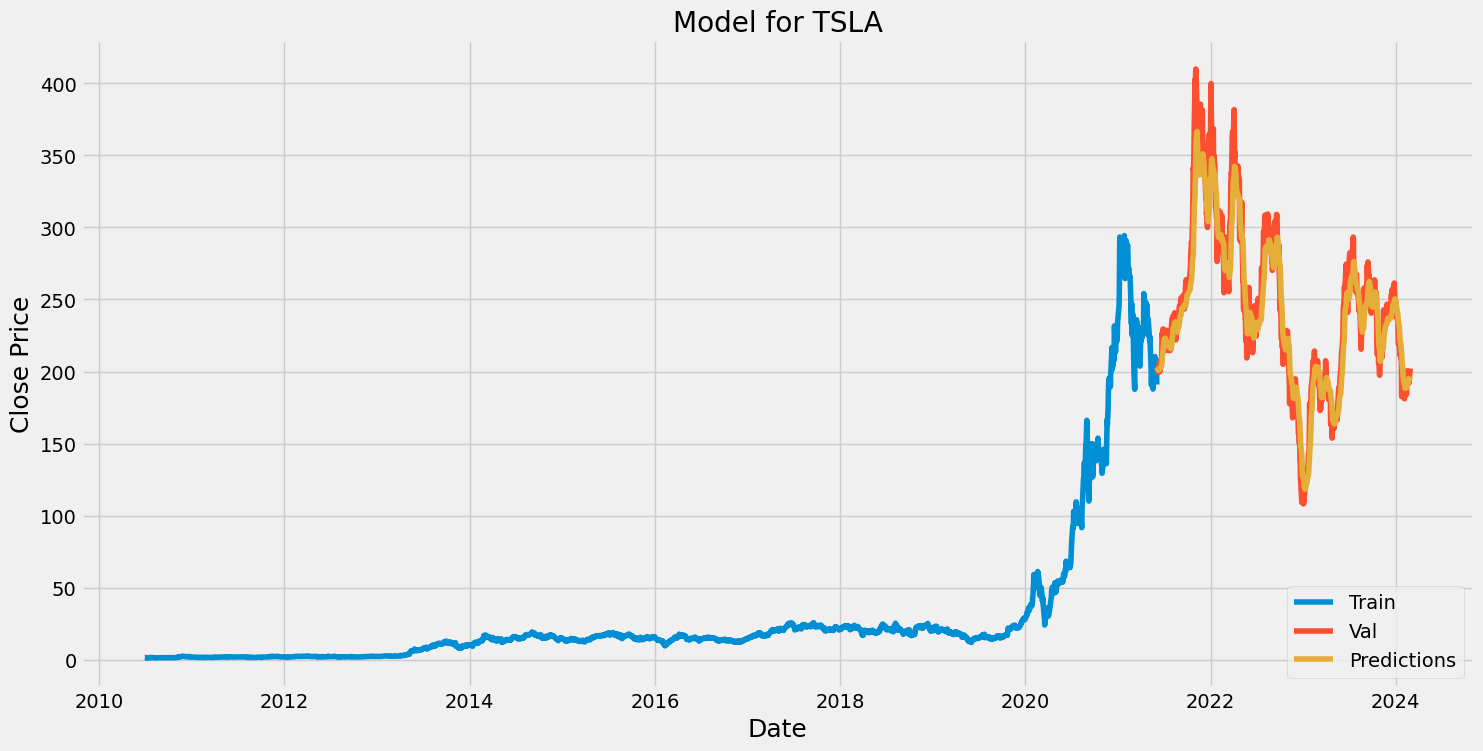

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
[*********************100%%**********************]  1 of 1 completed


37/37 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE) for BA: 10.510403658494416


<ipython-input-37-829430158fdd>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


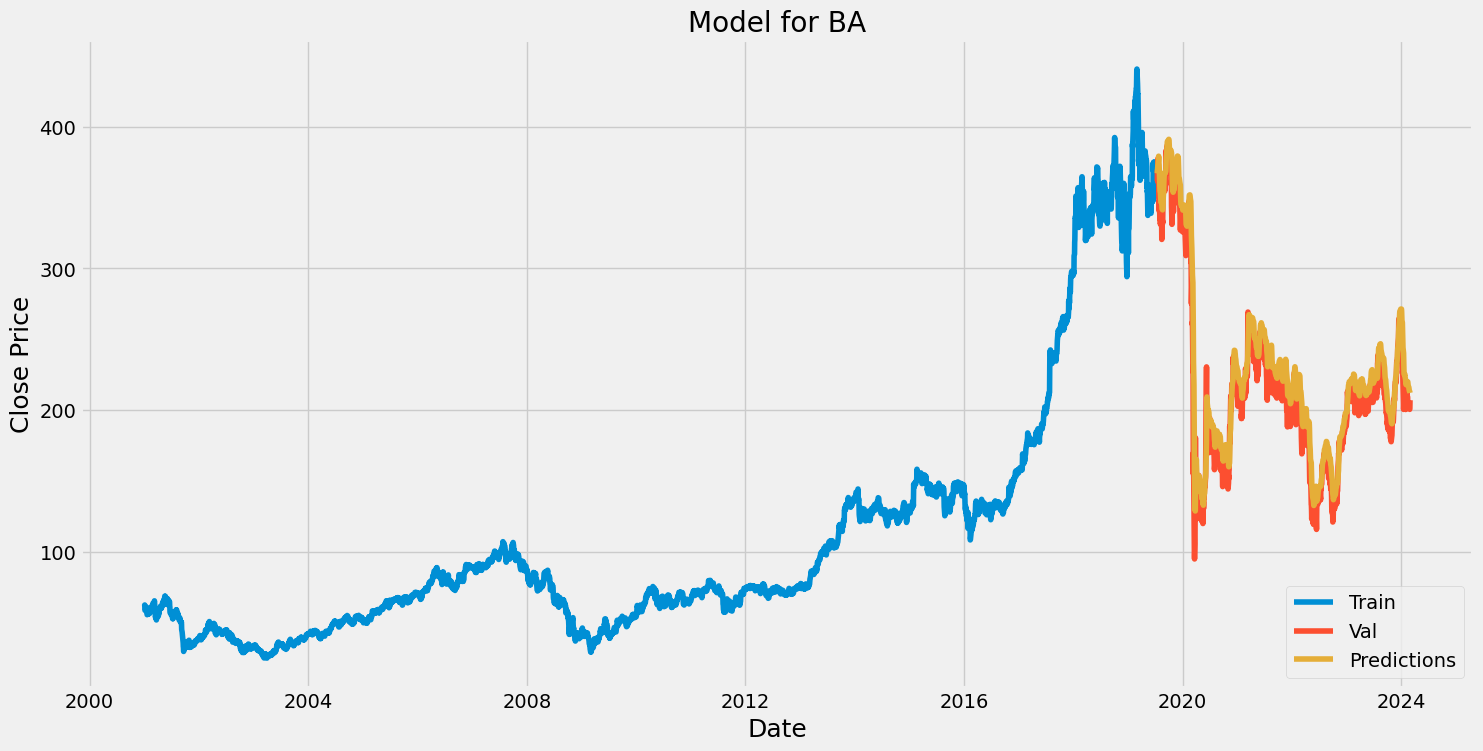

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
[*********************100%%**********************]  1 of 1 completed


37/37 [==============================] - 1s 4ms/step
Root Mean Squared Error (RMSE) for IBM: 1.550806528508919


<ipython-input-37-829430158fdd>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


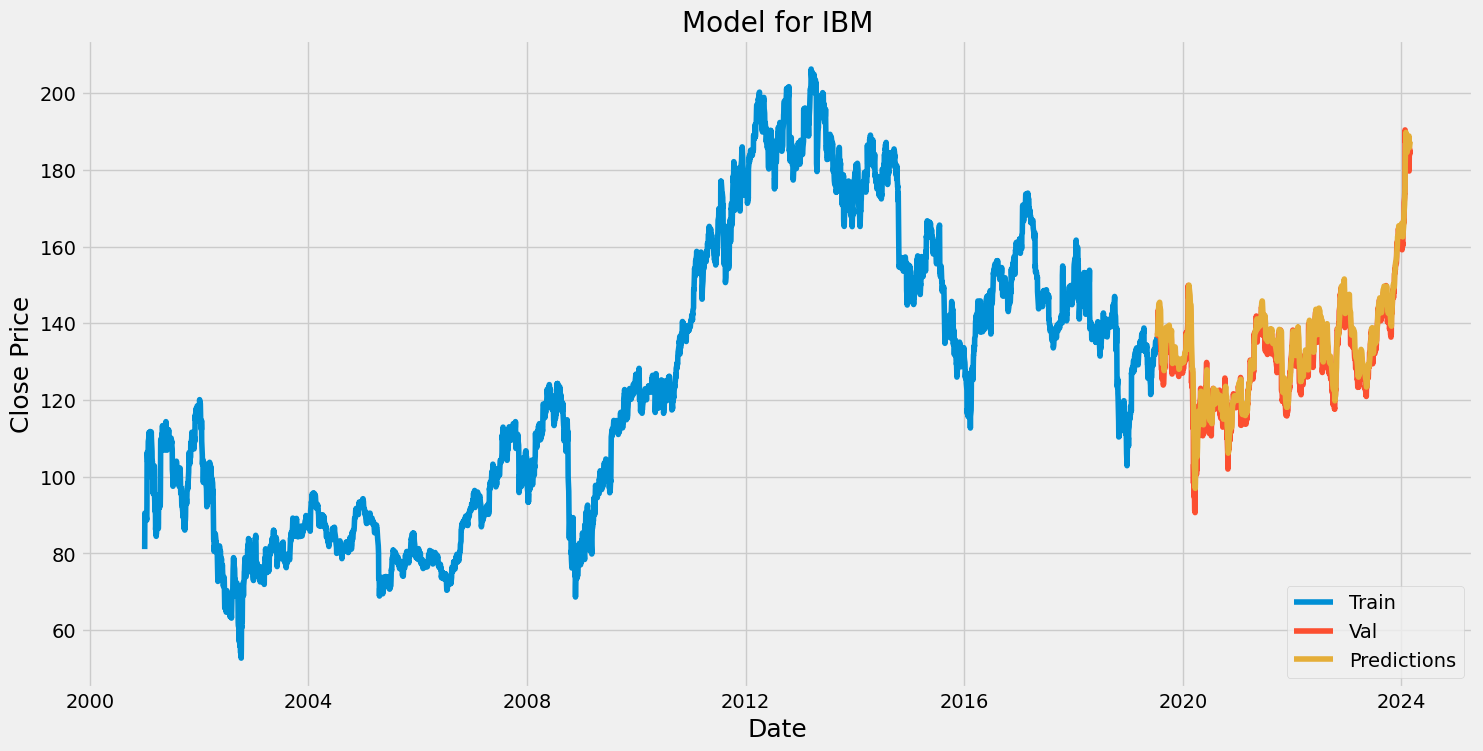

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
[*********************100%%**********************]  1 of 1 completed


37/37 [==============================] - 1s 5ms/step
Root Mean Squared Error (RMSE) for NVDA: 30.45638187719517


<ipython-input-37-829430158fdd>:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


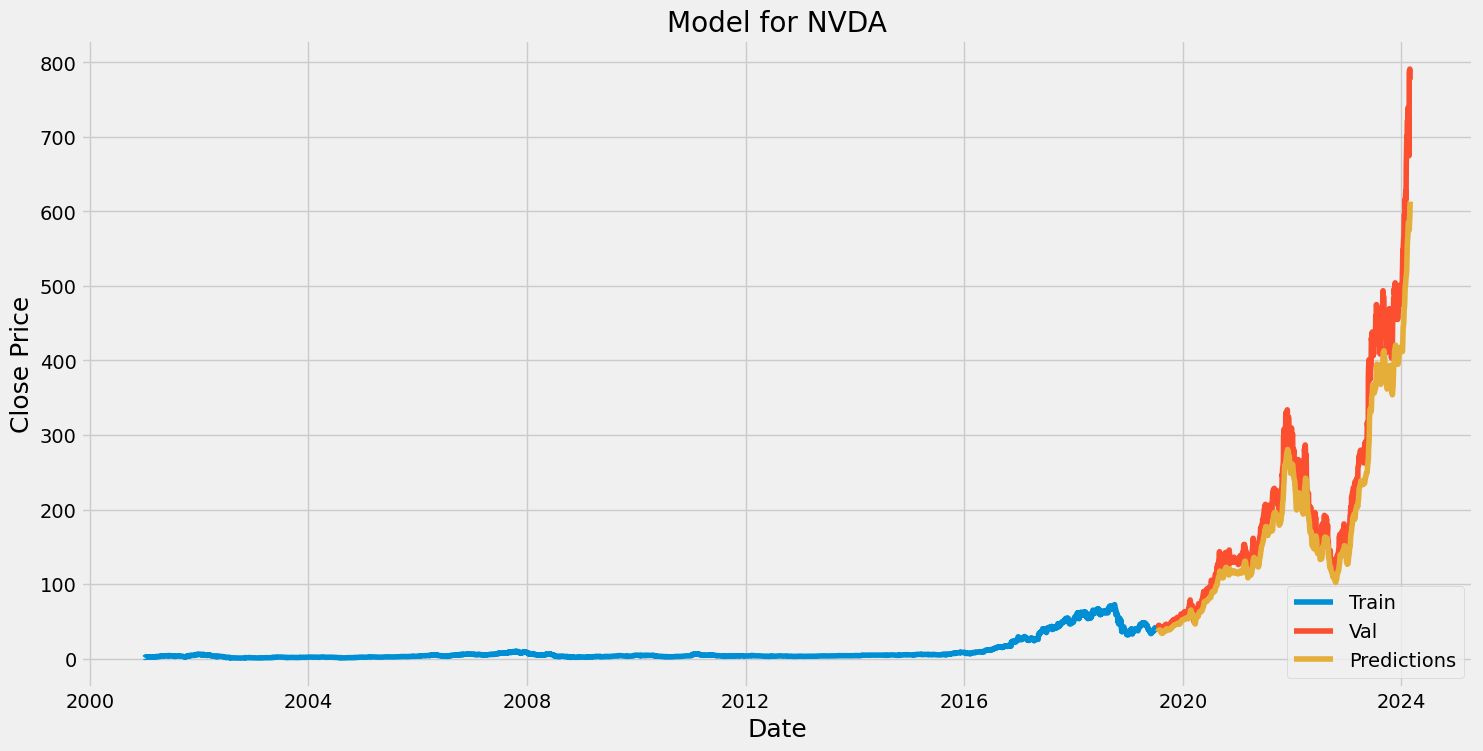

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

# Function to download stock data
def download_stock_data(stock, start, end):
    df = yf.download(stock, start, end)
    return df

# Define start and end dates
start = '2001-01-01'
end = '2024-02-29'

# List of stock symbols
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'NFLX', 'TSLA', 'BA', 'IBM', 'NVDA']

# Dictionary to store stock dataframes
stock_data = {}

# Data preprocessing and model training for each stock
for stock in stocks:
    # Download historical data for the stock
    stock_data[stock] = download_stock_data(stock, start, end)

    # Check if the dataset is not empty
    if stock_data[stock].empty:
        print(f"Warning: No data available for {stock}. Skipping...")
        continue

    # Extract Close prices for the stock
    data = stock_data[stock].filter(['Close'])
    dataset = data.values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Split the data into training and testing sets
    training_data_len = math.ceil(len(dataset) * .8)
    train_data = scaled_data[0:training_data_len, :]

    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)

    # Test data preparation
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Make predictions
    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    # Calculate RMSE
    rmse = np.sqrt(np.mean(predictions - dataset[training_data_len:, :])**2)
    print(f'Root Mean Squared Error (RMSE) for {stock}: {rmse}')

    # Plot the predictions
    train = data[:training_data_len]
    valid = data[training_data_len:]
    valid['Predictions'] = predictions

    plt.figure(figsize=(16, 8))
    plt.title(f'Model for {stock}')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price', fontsize=18)
    plt.plot(train['Close'])
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()

    # Save the trained model for each stock if needed
    model.save(f'model_{stock}.h5')


[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 19ms/step
Predicted Closing Prices for the next 10 days for AAPL:
[[175.83778]
 [175.83778]
 [175.83778]
 [175.83778]
 [175.83778]
 [175.83778]
 [175.83778]
 [175.83778]
 [175.83778]
 [175.83778]]


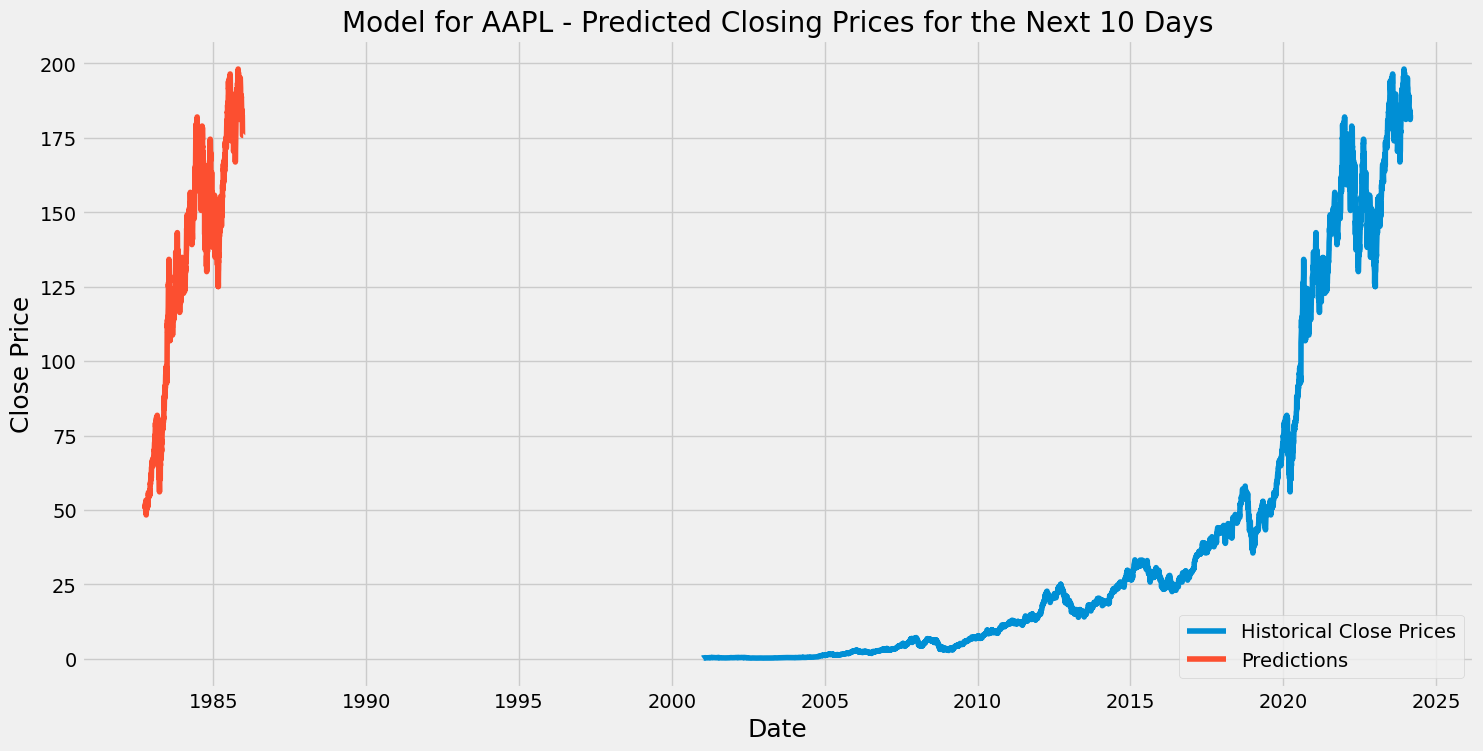

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 18ms/step
Predicted Closing Prices for the next 10 days for GOOG:
[[146.19992]
 [146.19992]
 [146.19992]
 [146.19992]
 [146.19992]
 [146.19992]
 [146.19992]
 [146.19992]
 [146.19992]
 [146.19992]]


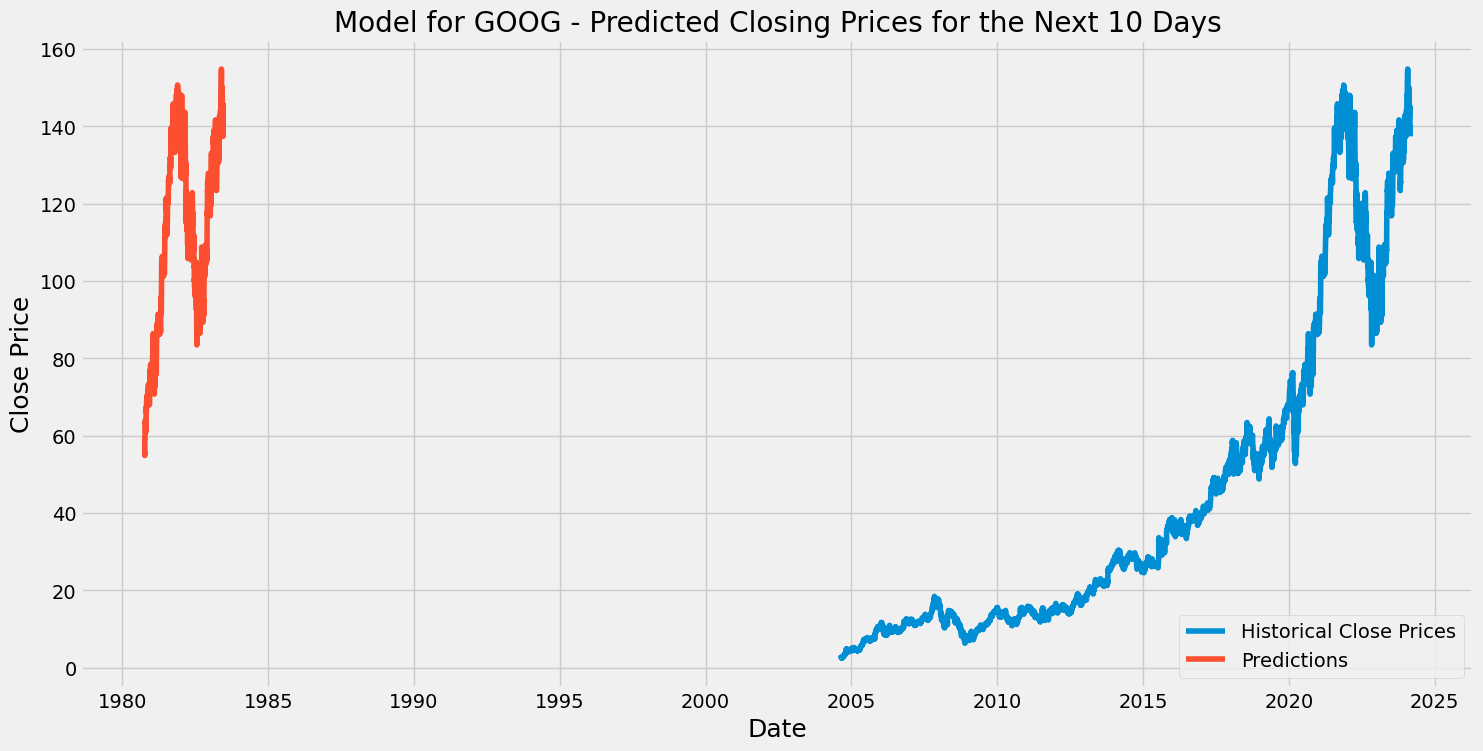

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 18ms/step
Predicted Closing Prices for the next 10 days for MSFT:
[[350.03656]
 [350.03656]
 [350.03656]
 [350.03656]
 [350.03656]
 [350.03656]
 [350.03656]
 [350.03656]
 [350.03656]
 [350.03656]]


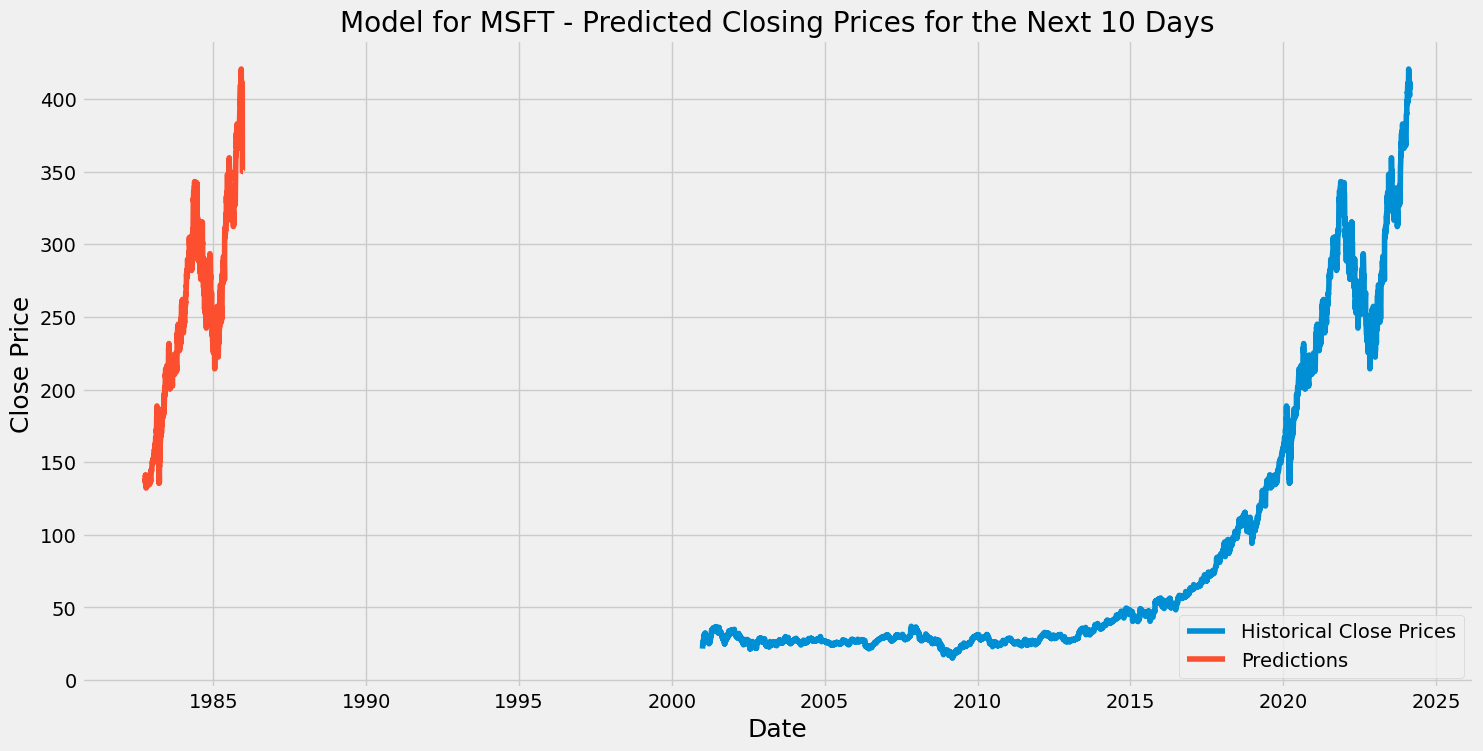

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 18ms/step
Predicted Closing Prices for the next 10 days for AMZN:
[[160.64844]
 [160.64844]
 [160.64844]
 [160.64844]
 [160.64844]
 [160.64844]
 [160.64844]
 [160.64844]
 [160.64844]
 [160.64844]]


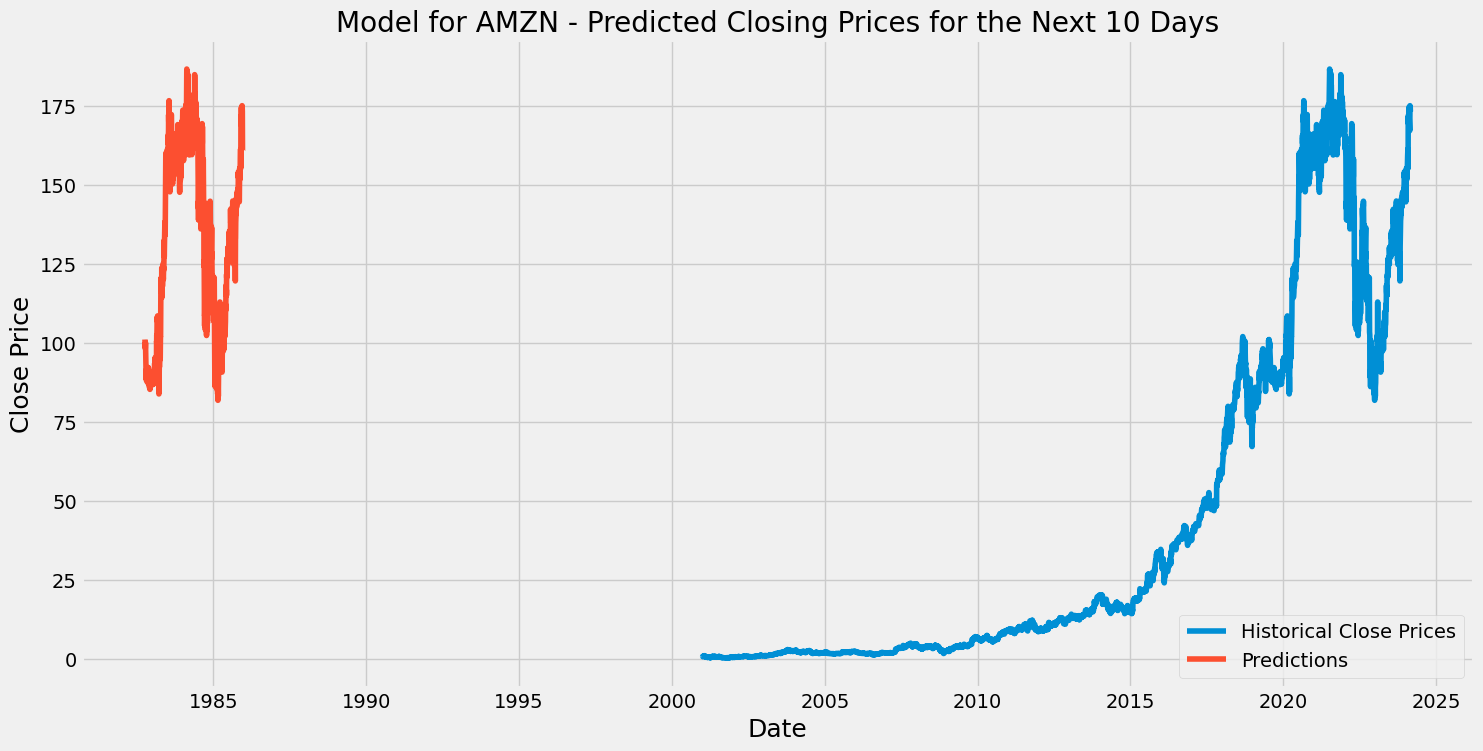

[*********************100%%**********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['FB']: Exception('%ticker%: No timezone found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 17ms/step
Predicted Closing Prices for the next 10 days for NFLX:
[[483.10904]
 [483.10904]
 [483.10904]
 [483.10904]
 [483.10904]
 [483.10904]
 [483.10904]
 [483.10904]
 [483.10904]
 [483.10904]]


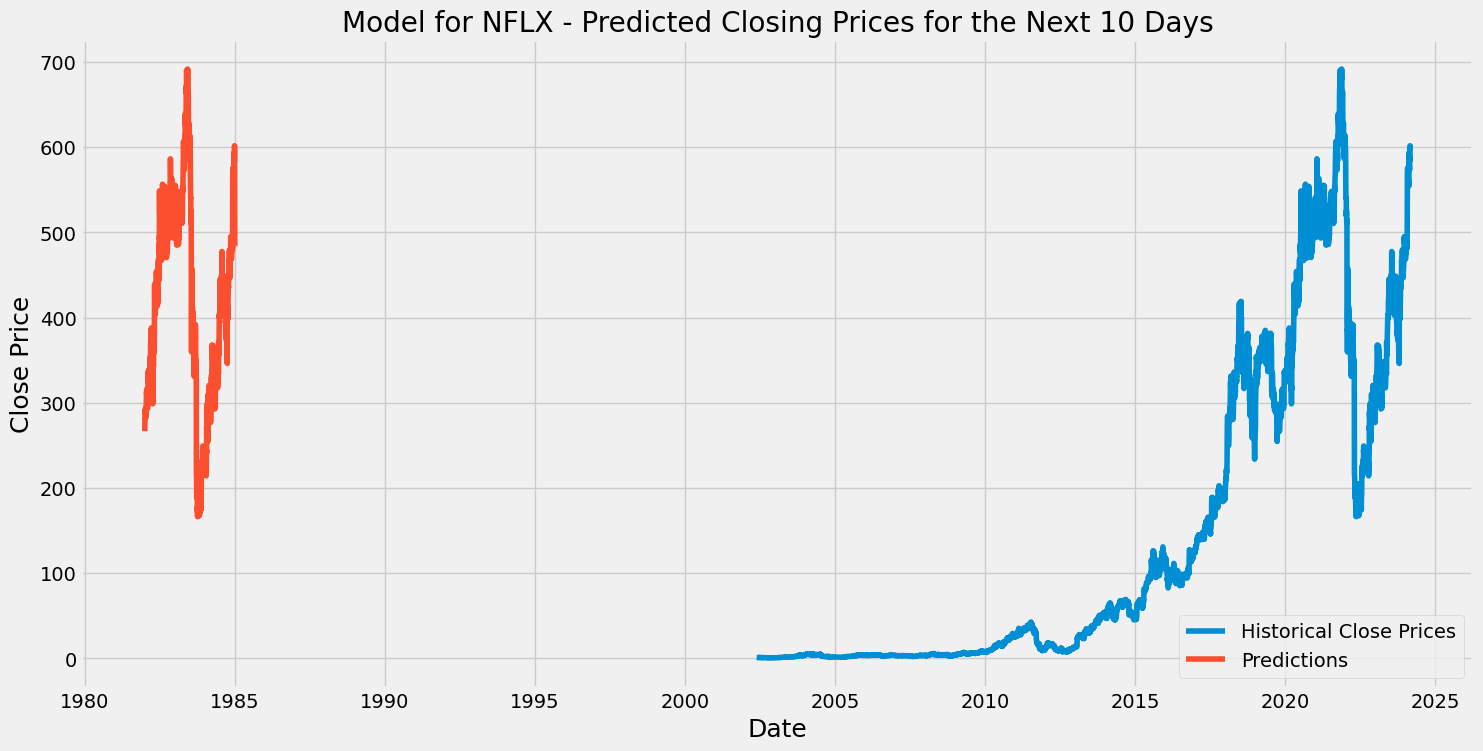

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 18ms/step
Predicted Closing Prices for the next 10 days for TSLA:
[[196.53174]
 [196.53174]
 [196.53174]
 [196.53174]
 [196.53174]
 [196.53174]
 [196.53174]
 [196.53174]
 [196.53174]
 [196.53174]]


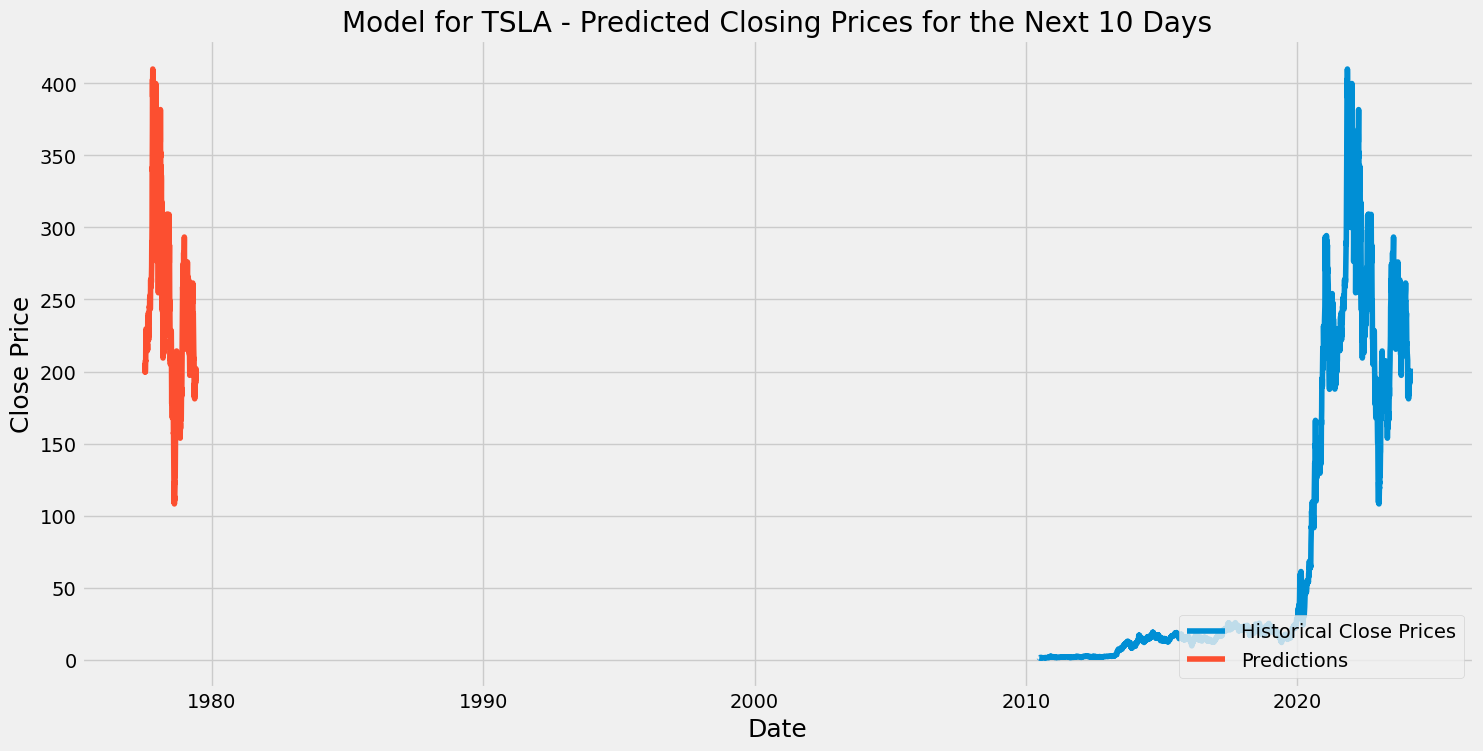

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 20ms/step
Predicted Closing Prices for the next 10 days for BA:
[[214.95683]
 [214.95683]
 [214.95683]
 [214.95683]
 [214.95683]
 [214.95683]
 [214.95683]
 [214.95683]
 [214.95683]
 [214.95683]]


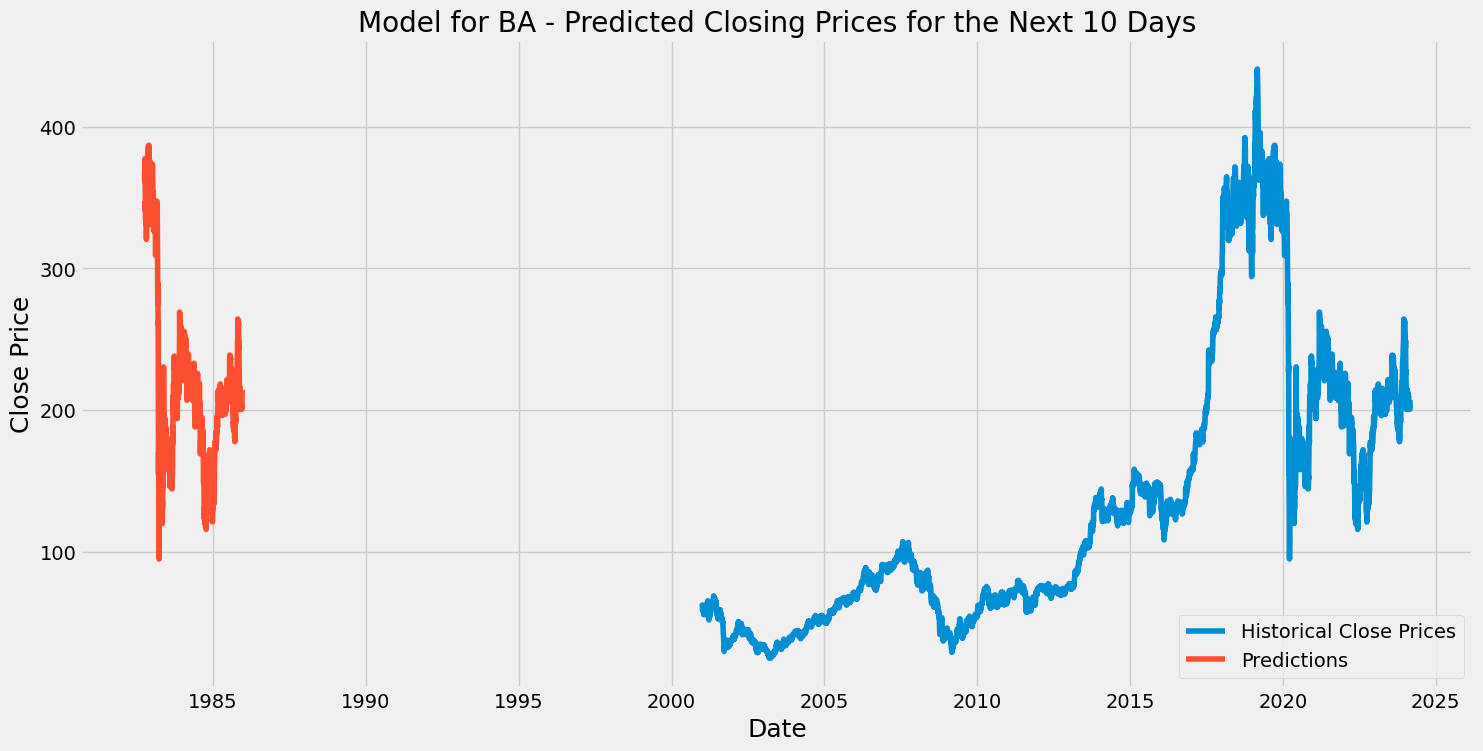

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 19ms/step
Predicted Closing Prices for the next 10 days for IBM:
[[185.99908]
 [185.99908]
 [185.99908]
 [185.99908]
 [185.99908]
 [185.99908]
 [185.99908]
 [185.99908]
 [185.99908]
 [185.99908]]


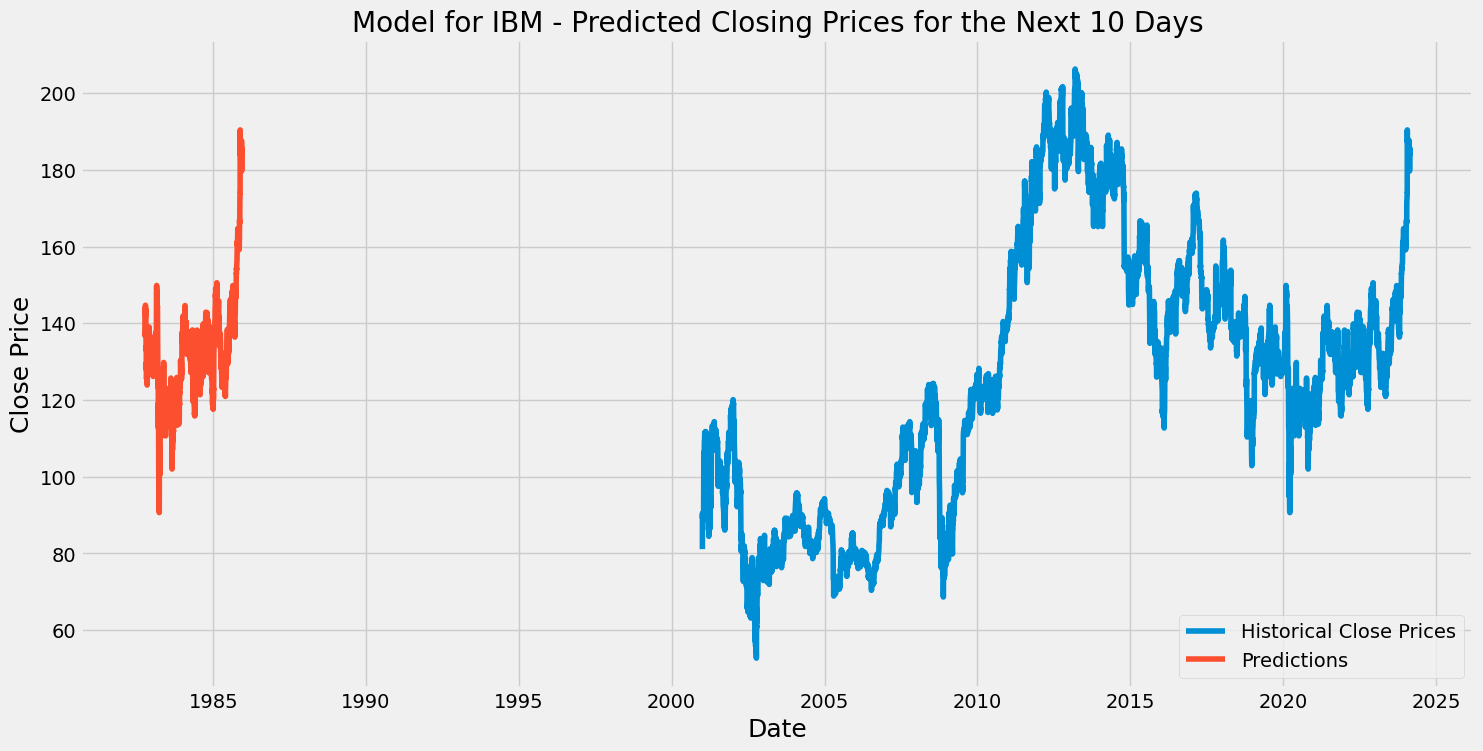

[*********************100%%**********************]  1 of 1 completed


1/1 [==============================] - 0s 18ms/step
Predicted Closing Prices for the next 10 days for NVDA:
[[665.73895]
 [665.73895]
 [665.73895]
 [665.73895]
 [665.73895]
 [665.73895]
 [665.73895]
 [665.73895]
 [665.73895]
 [665.73895]]


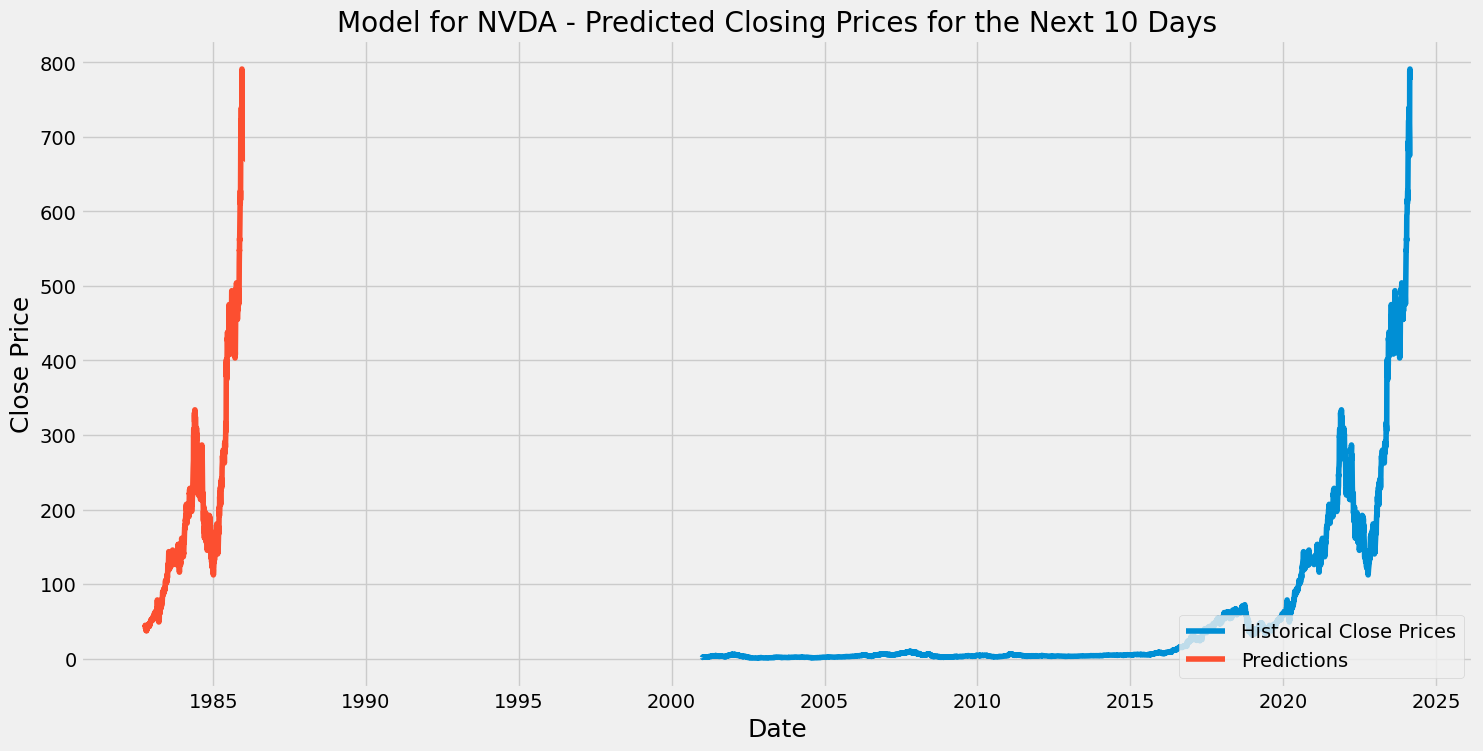

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

# Function to download stock data
def download_stock_data(stock, start, end):
    df = yf.download(stock, start, end)
    return df

# Define start and end dates
start = '2001-01-01'
end = '2024-02-29'

# List of stock symbols
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'NFLX', 'TSLA', 'BA', 'IBM', 'NVDA']

# Dictionary to store stock dataframes
stock_data = {}

# Data preprocessing and model training for each stock
for stock in stocks:
    # Download historical data for the stock
    stock_data[stock] = download_stock_data(stock, start, end)

    # Check if the dataset is not empty
    if stock_data[stock].empty:
        print(f"Warning: No data available for {stock}. Skipping...")
        continue

    # Extract Close prices for the stock
    data = stock_data[stock].filter(['Close'])
    dataset = data.values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Split the data into training and testing sets
    training_data_len = math.ceil(len(dataset) * .8)
    train_data = scaled_data[0:training_data_len, :]

    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=1, epochs=1)

    # Test data preparation for the next 10 days
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Make predictions for the next 10 days
    predictions = []
    current_x = x_test[-1]

    for _ in range(10):
        current_x = np.reshape(current_x, (1, 60, 1))
        next_day_prediction = model.predict(current_x)
        predictions.append(next_day_prediction[0, 0])
        current_x = np.reshape(current_x, (current_x.shape[1], 1))  # Correcting dimensionality

    # Inverse transform the predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    print(f'Predicted Closing Prices for the next 10 days for {stock}:')
    print(predictions)

    # Plot the predictions
    plt.figure(figsize=(16, 8))
    plt.title(f'Model for {stock} - Predicted Closing Prices for the Next 10 Days')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price', fontsize=18)
    plt.plot(data['Close'], label='Historical Close Prices')
    plt.plot(np.arange(training_data_len, len(dataset) + 10), np.concatenate([dataset[training_data_len:, :], predictions]))
    plt.legend(['Historical Close Prices', 'Predictions'], loc='lower right')
    plt.show()


In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
import tensorflow as tf
from tensorflow import keras

# Function to download stock data
def download_stock_data(stock, start, end):
    df = yf.download(stock, start, end)
    return df

# Define start and end dates
start = '2001-01-01'
end = '2024-02-29'

# List of stock symbols
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN', 'FB', 'NFLX', 'TSLA', 'BA', 'IBM', 'NVDA']

# Dictionary to store stock dataframes
stock_data = {}

# Data preprocessing and model training for each stock
for stock in stocks:
    # Download historical data for the stock
    stock_data[stock] = download_stock_data(stock, start, end)

    # Check if the dataset is not empty
    if stock_data[stock].empty:
        print(f"Warning: No data available for {stock}. Skipping...")
        continue

    # Extract Close prices for the stock
    data = stock_data[stock].filter(['Close'])
    dataset = data.values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_data = scaler.fit_transform(dataset)

    # Split the data into training and testing sets
    training_data_len = math.ceil(len(dataset) * .8)
    train_data = scaled_data[0:training_data_len, :]

    x_train = []
    y_train = []

    for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    model.add(LSTM(100, return_sequences=False))
    model.add(Dense(50))
    model.add(Dense(1))
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model
    model.fit(x_train, y_train, batch_size=32, epochs=1)

    # Test data preparation for the next 10 days
    test_data = scaled_data[training_data_len - 60:, :]
    x_test = []

    for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

    # Make predictions for the next 10 days
    predictions = []
    current_x = x_test[-1]

    for _ in range(10):
        current_x = np.reshape(current_x, (1, 60, 1))
        next_day_prediction = model.predict(current_x)
        predictions.append(next_day_prediction[0, 0])
        current_x = np.append(current_x[:, 1:, :], [[next_day_prediction[0, 0]]], axis=1)

    # Inverse transform the predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    print(f'Predicted Closing Prices for the next 10 days for {stock}:')
    print(predictions)

    # Plot the predictions
    plt.figure(figsize=(16, 8))
    plt.title(f'Model for {stock} - Predicted Closing Prices for the Next 10 Days')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price', fontsize=18)
    plt.plot(data['Close'], label='Historical Close Prices')
    plt.plot(np.arange(training_data_len, len(dataset) + 10), np.concatenate([dataset[training_data_len:, :], predictions]))
    plt.legend(['Historical Close Prices', 'Predictions'], loc='lower right')
    plt.show()
